In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [ ]:
df=load_iris()
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
x=df.data
y=df.target

In [ ]:
y=pd.get_dummies(y).values
y[:3]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

Hyperparameters

In [ ]:
learning_rate=0.1
iterations=5000
N=y_train.size

input_size=4

hidden_size=2

output_size=3

results=pd.DataFrame(columns=['mse','accuracy'])

weights intialization

In [ ]:
#intializing weights with random values
np.random.seed(10)
W1=np.random.normal(scale=0.5,size=(input_size,hidden_size))

W2=np.random.normal(scale=0.5,size=(hidden_size,output_size))

Helper functions sigmoid, mean square error,and accuracy

In [ ]:
def sigmoid(x):
  return 1/ (1 + np.exp(-x))

def mean_squared_error(y_pred,y_true):
  return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def accuracy(y_pred,y_true):
  acc= y_pred.argmax(axis=1) == y_true.argmax(axis=1)
  return acc.mean()

Creation of backpropagation neural network

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for itr in range(iterations):

    # feedforward propagation
    Z1 = np.dot(x_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)


    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )

    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)


    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

Plotting of MSE

<Axes: title={'center': 'Mean Squared Error'}>

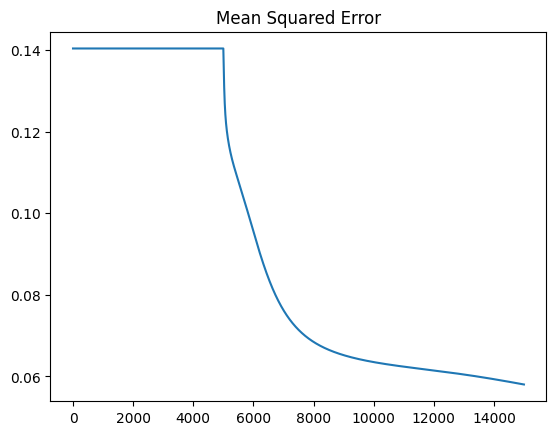

In [ ]:
results.mse.plot(title="Mean Squared Error")

plotting of accuracy

<Axes: title={'center': 'Accuracy'}>

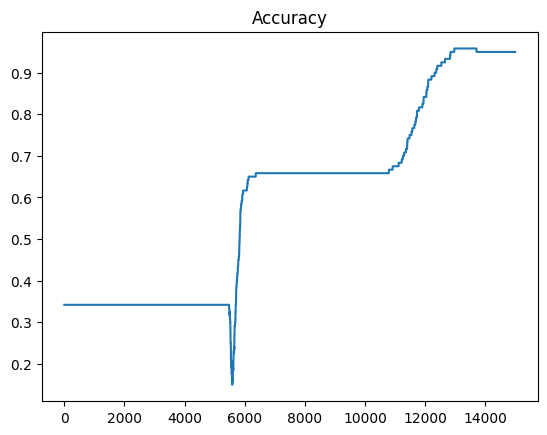

In [ ]:
results.accuracy.plot(title="Accuracy")

score of accuracy

In [ ]:
Z1 = np.dot(x_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.9666666666666667
